In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data_train = pd.read_excel("/content/drive/My Drive/hackthons projects/Food Delivery Prediction/Participants-Data-20191108T095009Z-001/Participants Data/Data_Train.xlsx")
data_test = pd.read_excel("/content/drive/My Drive/hackthons projects/Food Delivery Prediction/Participants-Data-20191108T095009Z-001/Participants Data/Data_Test.xlsx")

In [0]:
data_train.head(10)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes
5,ID_5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",₹150,₹50,3.8,46,18,30 minutes
6,ID_3777,Mumbai Central,"Beverages, Fast Food",₹150,₹50,3.7,108,31,30 minutes
7,ID_745,Delhi University-GTB Nagar,"Chinese, Thai, Asian",₹650,₹50,4.0,1731,1235,45 minutes
8,ID_2970,Delhi University-GTB Nagar,"Mithai, Street Food",₹100,₹50,3.9,110,26,30 minutes
9,ID_3474,"Sector 1, Noida","Fast Food, North Indian, Rolls, Chinese, Momos...",₹200,₹50,3.9,562,294,65 minutes


In [0]:
data = data_train.copy()


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 780.2+ KB


In [0]:
data["Average_Cost"] = data["Average_Cost"].str.replace("₹", "").str.replace(",", "")
data["Minimum_Order"] = data["Minimum_Order"].str.replace("₹", "")

In [0]:
# data["Average_Cost"] = data["Average_Cost"].astype(int)
data["Minimum_Order"] = data["Minimum_Order"].astype(int)



In [0]:
data.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65 minutes


In [0]:
data["Rating"].value_counts()

-                     1191
3.7                    869
3.6                    846
3.5                    818
3.8                    800
NEW                    758
3.9                    749
3.4                    718
3.3                    675
4.0                    614
3.2                    511
4.1                    459
3.1                    411
3.0                    302
4.2                    272
4.3                    247
2.9                    199
2.8                    157
4.4                    142
4.5                     78
2.7                     76
2.6                     42
4.6                     41
4.7                     36
2.5                     27
2.4                     13
4.8                     13
Opening Soon            12
4.9                      8
2.3                      6
Temporarily Closed       2
2.2                      1
2.1                      1
Name: Rating, dtype: int64

In [0]:
data["Rating"].str.extractall(r"([a-zA-Z]+\s+[a-zA-Z]+)")

,,0
,match,
1330,0,Opening Soon
1566,0,Opening Soon
2710,0,Opening Soon
3099,0,Opening Soon
3354,0,Opening Soon
5702,0,Opening Soon
5729,0,Opening Soon
6175,0,Opening Soon
7097,0,Temporarily Closed


In [0]:
list_of_words = ["Opening Soon", "Temporarily Closed", "-", "NEW"]
data["Rating"][data["Rating"].isin(list_of_words)] = np.nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
data["Rating"].value_counts(dropna = False)
data["Rating"].fillna(0,inplace = True)

In [0]:
data["Votes"] = data["Votes"].str.replace("-", "0")

In [0]:
data["Votes"].value_counts()

0       2074
4        248
6        200
7        182
9        181
        ... 
869        1
1978       1
677        1
2032       1
1949       1
Name: Votes, Length: 1103, dtype: int64

In [0]:
data["Reviews"] = data["Reviews"].str.replace("-", "0")

In [0]:
#checking the null values
data.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

In [0]:
data.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65 minutes


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null int64
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: int64(1), object(8)
memory usage: 780.2+ KB


In [0]:
data["Average_Cost"] = data["Average_Cost"].str.replace("for", "0")

In [0]:
data["Rating"] = data["Rating"].astype(float)
data["Votes"] = data["Votes"].astype(int)
data["Reviews"] = data["Reviews"].astype(int)
data["Average_Cost"] = data["Average_Cost"].astype(int)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null int64
Minimum_Order    11094 non-null int64
Rating           11094 non-null float64
Votes            11094 non-null int64
Reviews          11094 non-null int64
Delivery_Time    11094 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 780.2+ KB


In [0]:
data["Delivery_Time"].value_counts()

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

In [0]:
data["Restaurant"].value_counts()

ID_7184    22
ID_7295    20
ID_4625    20
ID_5321    19
ID_5538    19
           ..
ID_1797     1
ID_837      1
ID_4115     1
ID_7535     1
ID_7804     1
Name: Restaurant, Length: 7480, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

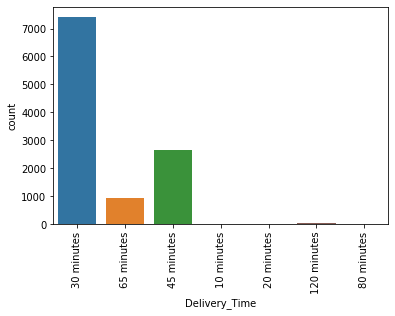

In [0]:
sns.countplot(data =data_train, x = "Delivery_Time")
plt.xticks(rotation = 90)

In [0]:
data_train["Delivery_Time"].value_counts()

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

In [0]:
data.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65 minutes


In [0]:
data["Area"] = data["Location"].str.split(",").str[-1]

In [0]:
data.head(10)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Area
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30 minutes,Pune
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30 minutes,Marathalli
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65 minutes,Mumbai Central
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30 minutes,Noida
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65 minutes,Whitefield
5,ID_5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",150,50,3.8,46,18,30 minutes,Whitefield
6,ID_3777,Mumbai Central,"Beverages, Fast Food",150,50,3.7,108,31,30 minutes,Mumbai Central
7,ID_745,Delhi University-GTB Nagar,"Chinese, Thai, Asian",650,50,4.0,1731,1235,45 minutes,Delhi University-GTB Nagar
8,ID_2970,Delhi University-GTB Nagar,"Mithai, Street Food",100,50,3.9,110,26,30 minutes,Delhi University-GTB Nagar
9,ID_3474,"Sector 1, Noida","Fast Food, North Indian, Rolls, Chinese, Momos...",200,50,3.9,562,294,65 minutes,Noida


In [0]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [0]:
mean_average_cost = data.pivot_table(index = ["Restaurant"],values = "Average_Cost")
encoded = pd.Series(data = lb.fit_transform(mean_average_cost["Average_Cost"]), index = mean_average_cost.index)
data["Restaurant"] = data["Restaurant"].map(encoded)

In [0]:
data

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Area
0,33,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30 minutes,Pune
1,3,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30 minutes,Marathalli
2,15,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65 minutes,Mumbai Central
3,49,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30 minutes,Noida
4,33,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65 minutes,Whitefield
...,...,...,...,...,...,...,...,...,...,...
11089,49,"BTM Layout 1, Electronic City","Tibetan, Chinese, Continental, Momos",250,50,4.2,326,189,30 minutes,Electronic City
11090,3,"Sector 14, Noida",Fast Food,100,50,3.6,36,16,30 minutes,Noida
11091,3,Majestic,"South Indian, Chinese, North Indian",100,50,3.5,45,18,30 minutes,Majestic
11092,3,"Sector 3, Marathalli",North Indian,100,50,3.1,24,9,30 minutes,Marathalli


In [0]:
dic_area_count = data["Area"].value_counts().to_dict()
data["Area"] = data["Area"].map(dic_area_count)

In [0]:
dic_foodorders = data["Cuisines"].value_counts().to_dict()
data["Cuisines"] =data["Cuisines"].map(dic_foodorders)

In [0]:
data.head(10)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Area
0,33,"FTI College, Law College Road, Pune",1,200,50,3.5,12,4,30 minutes,1358
1,3,"Sector 3, Marathalli",61,100,50,3.5,11,4,30 minutes,366
2,15,Mumbai Central,3,150,50,3.6,99,30,65 minutes,459
3,49,"Sector 1, Noida",16,250,99,3.7,176,95,30 minutes,2086
4,33,"Rmz Centennial, I Gate, Whitefield",14,200,99,3.2,521,235,65 minutes,457
5,15,"Rmz Centennial, I Gate, Whitefield",66,150,50,3.8,46,18,30 minutes,457
6,9,Mumbai Central,53,150,50,3.7,108,31,30 minutes,459
7,83,Delhi University-GTB Nagar,9,650,50,4.0,1731,1235,45 minutes,545
8,3,Delhi University-GTB Nagar,73,100,50,3.9,110,26,30 minutes,545
9,33,"Sector 1, Noida",2,200,50,3.9,562,294,65 minutes,2086


In [0]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR= q3-q1 
((data< (q1-1.5*IQR)) | (data > (q3+1.5*IQR))).sum()

Area                0
Average_Cost      867
Cuisines         1898
Delivery_Time       0
Location            0
Minimum_Order     976
Rating           1963
Restaurant        838
Reviews          1490
Votes            1420
dtype: int64

In [0]:
columns = ['Restaurant', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews']
for i in columns:
       
  q75, q25 = np.percentile(data[i], [75,25])
  iqr = q75-q25
  minimum = q25-1.5*iqr
  maximum = q75+1.5*iqr
  data.loc[data[i] < minimum, i] = minimum
  data.loc[data[i] > maximum, i]= maximum

In [0]:
((data< (q1-1.5*IQR)) | (data > (q3+1.5*IQR))).sum()

Area             0
Average_Cost     0
Cuisines         0
Delivery_Time    0
Location         0
Minimum_Order    0
Rating           0
Restaurant       0
Reviews          0
Votes            0
dtype: int64

In [0]:
data.skew()

Restaurant       0.556002
Cuisines         1.201727
Average_Cost     0.652784
Minimum_Order    0.000000
Rating          -0.877016
Votes            1.206945
Reviews          1.196568
Area             0.868114
dtype: float64

In [0]:
cols = ['Restaurant', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Area']
for i in cols:
  data[i] = np.log(data[i]+1)       

In [0]:
data.skew()

Restaurant      -0.744979
Cuisines        -0.064990
Average_Cost    -0.428448
Minimum_Order    0.000000
Rating          -1.121949
Votes           -0.426981
Reviews         -0.120592
Area            -0.082398
dtype: float64

In [0]:
x =data.drop(["Delivery_Time", "Location"], axis = 1)
y = data["Delivery_Time"]

[0.06488192 0.15264597 0.04005002 0.         0.1748731  0.24174216
 0.18962345 0.13618338]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


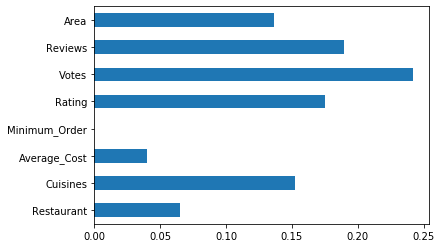

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_imp = pd.Series(model.feature_importances_, index = x.columns)
feat_imp.plot(kind = "barh")

In [0]:
x = x.drop("Minimum_Order", axis = 1)

In [0]:

x

,Restaurant,Cuisines,Average_Cost,Rating,Votes,Reviews,Area
0,3.526361,0.693147,5.303305,1.504077,2.564949,1.609438,7.214504
1,1.386294,4.127134,4.615121,1.504077,2.484907,1.609438,5.905362
2,2.772589,1.386294,5.017280,1.526056,4.605170,3.433987,6.131226
3,3.912023,2.833213,5.525453,1.547563,5.176150,4.564348,7.643483
4,3.526361,2.708050,5.303305,1.435085,5.948035,5.046646,6.126869
...,...,...,...,...,...,...,...
11089,3.912023,0.693147,5.525453,1.648659,5.789960,5.046646,3.135494
11090,1.386294,6.028279,4.615121,1.526056,3.610918,2.833213,7.643483
11091,1.386294,2.397895,4.615121,1.504077,3.828641,2.944439,5.814131
11092,1.386294,6.028279,4.615121,1.410987,3.218876,2.302585,5.905362


In [0]:
y.value_counts()

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

In [0]:
print(x.shape, y.shape)

(11094, 7) (11094,)


In [0]:
# from imblearn.combine import SMOTETomek
# from imblearn.over_sampling import SMOTE
# smote=SMOTE("all",kind = "regular",k_neighbors = 3)
# X,Y=smote.fit_sample(x,y)

In [0]:
# print(X.shape, Y.shape)

# **TEST DATA CLEANING**

In [0]:
data_test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


In [0]:
test = data_test.copy()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 8 columns):
Restaurant       2774 non-null object
Location         2774 non-null object
Cuisines         2774 non-null object
Average_Cost     2774 non-null object
Minimum_Order    2774 non-null object
Rating           2774 non-null object
Votes            2774 non-null object
Reviews          2774 non-null object
dtypes: object(8)
memory usage: 173.5+ KB


In [0]:
test["Average_Cost"] = test["Average_Cost"].str.replace("₹", "").str.replace(",", "")
test["Minimum_Order"] = test["Minimum_Order"].str.replace("₹", "")
test["Minimum_Order"] = test["Minimum_Order"].astype(int)


In [0]:
test["Rating"].value_counts()

-               305
3.6             223
3.9             216
3.7             212
NEW             200
3.5             197
3.4             185
3.8             183
3.3             153
4.0             141
3.2             129
3.1             120
4.1             115
4.2              70
3.0              65
2.9              57
4.3              52
2.8              41
4.4              29
2.7              22
4.5              18
2.6               9
4.6               7
2.5               6
4.7               6
2.4               5
4.8               3
Opening Soon      2
2.3               2
2.1               1
Name: Rating, dtype: int64

In [0]:
list_of_words = ["Opening Soon", "Temporarily Closed", "-", "NEW"]
test["Rating"][test["Rating"].isin(list_of_words)] = np.nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
test["Rating"].value_counts(dropna = False)

NaN    507
3.6    223
3.9    216
3.7    212
3.5    197
3.4    185
3.8    183
3.3    153
4.0    141
3.2    129
3.1    120
4.1    115
4.2     70
3.0     65
2.9     57
4.3     52
2.8     41
4.4     29
2.7     22
4.5     18
2.6      9
4.6      7
2.5      6
4.7      6
2.4      5
4.8      3
2.3      2
2.1      1
Name: Rating, dtype: int64

In [0]:
test["Rating"].fillna(0,inplace = True)

In [0]:
test["Votes"].value_counts()

-       542
7        60
9        57
6        55
5        51
       ... 
328       1
188       1
368       1
1147      1
358       1
Name: Votes, Length: 580, dtype: int64

In [0]:
test["Votes"] = test["Votes"].str.replace("-", "0")

In [0]:
test["Reviews"] = test["Reviews"].str.replace("-", "0")

In [0]:
#checking the null values
test.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
dtype: int64

In [0]:
test["Rating"] = test["Rating"].astype(float)
test["Votes"] = test["Votes"].astype(int)
test["Reviews"] = test["Reviews"].astype(int)
test["Average_Cost"] = test["Average_Cost"].astype(int)

In [0]:
test["Area"] = data["Location"].str.split(",").str[-1]

In [0]:
mean_average_cost1 = test.pivot_table(index = ["Restaurant"],values = "Average_Cost")
encoded1 = pd.Series(data = lb.fit_transform(mean_average_cost1["Average_Cost"]), index = mean_average_cost1.index)
test["Restaurant"] = test["Restaurant"].map(encoded1)

In [0]:
dic_area_count = test["Area"].value_counts().to_dict()
test["Area"] = test["Area"].map(dic_area_count)

In [0]:
dic_foodorders = test["Cuisines"].value_counts().to_dict()
test["Cuisines"] =test["Cuisines"].map(dic_foodorders)

In [0]:
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Area
0,20,"Mico Layout, Stage 2, BTM Layout,Bangalore",1,350,50,4.2,361,225,342
1,2,"Mico Layout, Stage 2, BTM Layout,Bangalore",6,100,50,0.0,0,0,79
2,2,"Sector 1, Noida",119,100,50,3.6,36,16,134
3,10,"Babarpur, New Delhi, Delhi",1,200,50,3.6,66,33,503
4,6,"Sector 1, Noida",23,150,50,2.9,38,14,119


In [0]:
Q1 = test.quantile(0.25)
Q3 = test.quantile(0.75)
IQR= Q3-Q1 
((test< (Q1-1.5*IQR)) | (test > (Q3+1.5*IQR))).sum()

Area               0
Average_Cost     162
Cuisines         517
Location           0
Minimum_Order    218
Rating           507
Restaurant        97
Reviews          364
Votes            341
dtype: int64

In [0]:
columns_1 = ['Restaurant', 'Average_Cost', 'Minimum_Order',"Cuisines",
       'Rating', 'Votes', 'Reviews']
for i in columns_1:
       
  q75, q25 = np.percentile(test[i], [75,25])
  iqr = q75-q25
  minimum = q25-1.5*iqr
  maximum = q75+1.5*iqr
  test.loc[test[i] < minimum, i] = minimum
  test.loc[test[i] > maximum, i]= maximum

In [0]:
((test< (Q1-1.5*IQR)) | (test > (Q3+1.5*IQR))).sum()

Area             0
Average_Cost     0
Cuisines         0
Location         0
Minimum_Order    0
Rating           0
Restaurant       0
Reviews          0
Votes            0
dtype: int64

In [0]:
test.skew()

Restaurant       0.682158
Cuisines         1.077220
Average_Cost     0.618555
Minimum_Order    0.000000
Rating          -0.868044
Votes            1.207319
Reviews          1.209794
Area             0.774490
dtype: float64

In [0]:
cols_1= ['Restaurant', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Area']
for i in cols_1:
  test[i] = np.log(test[i]+1)       

In [0]:
test.skew()

Restaurant      -0.626999
Cuisines         0.146204
Average_Cost    -0.331594
Minimum_Order    0.000000
Rating          -1.096908
Votes           -0.405331
Reviews         -0.102511
Area            -0.119786
dtype: float64

In [0]:
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Area
0,3.044522,"Mico Layout, Stage 2, BTM Layout,Bangalore",0.693147,5.860786,3.931826,1.648659,5.891644,5.007296,5.837730
1,1.098612,"Mico Layout, Stage 2, BTM Layout,Bangalore",1.945910,4.615121,3.931826,1.029619,0.000000,0.000000,4.382027
2,1.098612,"Sector 1, Noida",4.532599,4.615121,3.931826,1.526056,3.610918,2.833213,4.905275
3,2.397895,"Babarpur, New Delhi, Delhi",0.693147,5.303305,3.931826,1.526056,4.204693,3.526361,6.222576
4,1.945910,"Sector 1, Noida",3.178054,5.017280,3.931826,1.360977,3.663562,2.708050,4.787492


In [0]:
X_test = test.drop(["Location", "Minimum_Order"],axis = 1)

In [0]:
X_test.head()

,Restaurant,Cuisines,Average_Cost,Rating,Votes,Reviews,Area
0,3.044522,0.693147,5.860786,1.648659,5.891644,5.007296,5.837730
1,1.098612,1.945910,4.615121,1.029619,0.000000,0.000000,4.382027
2,1.098612,4.532599,4.615121,1.526056,3.610918,2.833213,4.905275
3,2.397895,0.693147,5.303305,1.526056,4.204693,3.526361,6.222576
4,1.945910,3.178054,5.017280,1.360977,3.663562,2.708050,4.787492


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.15,random_state = 42, stratify = y)

In [0]:
y_train.value_counts()

30 minutes     6295
45 minutes     2265
65 minutes      784
120 minutes      53
20 minutes       17
80 minutes       12
10 minutes        3
Name: Delivery_Time, dtype: int64

In [0]:
y_test.value_counts()

30 minutes     1111
45 minutes      400
65 minutes      139
120 minutes       9
20 minutes        3
80 minutes        2
10 minutes        1
Name: Delivery_Time, dtype: int64

In [0]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
adasyn=ADASYN("not majority",n_neighbors = 2)
X,Y=adasyn.fit_sample(x_train,y_train)

In [0]:
from collections import Counter
print("Before:", Counter(y_train))
print("After:", Counter(Y))

Before: Counter({'30 minutes': 6295, '45 minutes': 2265, '65 minutes': 784, '120 minutes': 53, '20 minutes': 17, '80 minutes': 12, '10 minutes': 3})
After: Counter({'65 minutes': 6354, '45 minutes': 6308, '20 minutes': 6296, '30 minutes': 6295, '10 minutes': 6295, '80 minutes': 6294, '120 minutes': 6285})


In [0]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# sc_xtrain = sc.fit_transform(x_train)
# sc_xtest =sc.fit_transform(x_test)

In [0]:
# from sklearn.svm import SVC
# svc = SVC()
# svc.fit(x_train, y_train)
# svc_pred = svc.predict(x_test)


In [0]:
# print(accuracy_score(y_test, svc_pred))
# print("\n")
# print(classification_report(y_test, svc_pred))

#**RANDOM FOREST**

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
rfc = RandomForestClassifier(criterion= "entropy", n_estimators = 800)
rfc.fit(X,Y)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rfc_pred = pd.Series(rfc.predict(x_test))

In [0]:
rfc_pred

0       45 minutes
1       45 minutes
2       45 minutes
3       30 minutes
4       30 minutes
           ...    
1660    30 minutes
1661    45 minutes
1662    30 minutes
1663    30 minutes
1664    30 minutes
Length: 1665, dtype: object

In [0]:
print(accuracy_score(y_test,rfc_pred))
print(f1_score(y_test, rfc_pred))

0.7681681681681681


ValueError: ignored

In [0]:
# from imblearn.over_sampling import ADASYN
# adasyn=ADASYN("not majority",n_neighbors = 3)
# X1,Y1=adasyn.fit_sample(x,y)
# from collections import Counter
# print("Before:", Counter(y))
# print("After:", Counter(Y1))

In [0]:
# rfc.fit(X1,Y1)

In [0]:
# prediction = pd.Series(rfc.predict(X_test), name ="Delivery_Time")

In [0]:
# prediction

In [0]:
# test["Deliver_time"] = rfc_pred

In [0]:
# test.head()

In [0]:
# writer = pd.ExcelWriter("Final_Predicted_values4.xlsx")
# prediction.to_excel(writer,index = False)
# writer.save()

In [0]:
# len(prediction)

In [0]:
# accuracy_score(y_test, rfc_pred)

In [0]:
print(accuracy_score(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))
print("\n")
print(confusion_matrix(y_test, rfc_pred))

In [0]:
rfc.score(x_train,y_train)

#**GRADIENT BOOSTING**





In [0]:
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier
# gb = GradientBoostingClassifier(learning_rate=0.3, n_estimators= 600,max_leaf_nodes=8,random_state=42,max_depth=32)
# gb.fit(x_train, y_train)


In [0]:
# gb_pred = gb.predict(sc_xtest)
# print(accuracy_score(y_test, gb_pred))

#**ADABOOSTING**

In [0]:
# adb = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy", class_weight= "balanced"),n_estimators = 800, learning_rate = 0.275, random_state=42)
# adb.fit(X, Y)
# adb_pred = adb.predict(sc_xtest)
# print(accuracy_score(y_test, adb_pred))

#**XGBOOST**

In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.3,
              learning_rate=0.25, max_delta_step=0, max_depth=64,
              min_child_weight=3, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb.fit(X, Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.3,
              learning_rate=0.25, max_delta_step=0, max_depth=64,
              min_child_weight=3, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xgb_pred = xgb.predict(x_test.values)

In [0]:

print(accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))
print("\n")
print(confusion_matrix(y_test, xgb_pred))

0.7615615615615615
              precision    recall  f1-score   support

  10 minutes       1.00      1.00      1.00         1
 120 minutes       0.40      0.22      0.29         9
  20 minutes       0.00      0.00      0.00         3
  30 minutes       0.84      0.89      0.86      1111
  45 minutes       0.63      0.55      0.59       400
  65 minutes       0.44      0.39      0.41       139
  80 minutes       0.50      0.50      0.50         2

    accuracy                           0.76      1665
   macro avg       0.54      0.51      0.52      1665
weighted avg       0.75      0.76      0.75      1665



[[  1   0   0   0   0   0   0]
 [  0   2   0   6   1   0   0]
 [  0   0   0   3   0   0   0]
 [  0   3   0 989  90  29   0]
 [  0   0   2 137 221  40   0]
 [  0   0   0  44  40  54   1]
 [  0   0   0   1   0   0   1]]


In [0]:
# from sklearn.model_selection import cross_val_score
# accuracy = cross_val_score(rfc, X,Y, cv = 10, verbose = 3, scoring = "accuracy")

In [0]:
# accuracy.mean()

In [0]:
para = {"learning_rate"    : [ 0.20, 0.25,0.275, 0.30 ] ,
 "max_depth"        : [32,64,128],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.1,0.2,0.25,0.3],
 "colsample_bytree" : [ 0.4, 0.5,0.55,0.6,0.65,0.7 ] }

In [0]:
# param_grid = {'criterion':['gini', 'entropy'],
#     'max_depth': [80, 90, 100, 110],
#     'min_samples_leaf': [3, 4, 5,6,7],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [500,600,1000]
# }

In [0]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
rscv = RandomizedSearchCV(xgb,param_distributions=para,scoring = "f1_micro", n_jobs = -1, verbose = 3)
rscv.fit(X,Y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 39.2min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.275,
                                           max_delta_step=0, max_depth=64,
                                           min_child_weight=1, missing=None,
                                           n_estimators=500, n_jobs=1,
                                           nthread=None,
                                           objective='multi:softprob',
                                           random_state=0, reg_...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=10, 

In [0]:
rscv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.3,
              learning_rate=0.25, max_delta_step=0, max_depth=64,
              min_child_weight=3, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# rscv.best_params_

In [0]:
# rscv.best_score_

In [0]:
# !pip install catboost

In [0]:
# from  catboost import CatBoostClassifier
# clf = CatBoostClassifier()
# clf.fit(X,Y)

In [0]:
# cat_pred = clf.predict(x_test)

In [0]:
# accuracy_score(y_test, cat_pred)

In [0]:
# print(classification_report(cat_pred, y_test))

In [0]:
# y_train.value_counts(normalize= True)